## IMPORTS

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# remember to change the path!

df_train = pd.read_csv("/Users/Giacomo/Desktop/DM2/PRJ/ravdess_features_dm2/RavdessAudioOnlyFeatures_TRAIN.csv")
df_test = pd.read_csv("/Users/Giacomo/Desktop/DM2/PRJ/ravdess_features_dm2/RavdessAudioOnlyFeatures_TEST.csv")

In [176]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.set_style({'font.family':'serif', 'font.serif':'Computer Modern'})
sns.set_context(font_scale=2, rc={"font.size":10,"axes.titlesize":20,"axes.labelsize":15})

## DATA UNDERSTANDING

In [3]:
print(df_train.shape, df_test.shape)

(1828, 434) (624, 434)


In [5]:
df_train.head()

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,filename,frame_count,...,stft_max_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_q99_w4,stft_kur_w4,stft_skew_w4
0,audio-only,speech,neutral,normal,Kids are talking by the door,1st,1,M,03-01-01-01-01-01-01.wav,158558,...,1.0,0.000000,0.566462,0.709962,0.799141,0.896606,1.0,1.0,6.742190,-1.706215
1,audio-only,speech,neutral,normal,Kids are talking by the door,2nd,1,M,03-01-01-01-01-02-01.wav,160160,...,1.0,0.368623,0.472736,0.623183,0.744908,0.874713,1.0,1.0,-0.700420,-0.201495
2,audio-only,speech,neutral,normal,Dogs are sitting by the door,1st,1,M,03-01-01-01-02-01-01.wav,156956,...,1.0,0.000000,0.417919,0.643636,0.774253,0.899156,1.0,1.0,1.688986,-1.024773
3,audio-only,speech,neutral,normal,Dogs are sitting by the door,2nd,1,M,03-01-01-01-02-02-01.wav,152152,...,1.0,0.306280,0.399641,0.606910,0.755213,0.886474,1.0,1.0,-0.594111,-0.412871
4,audio-only,speech,calm,normal,Kids are talking by the door,1st,1,M,03-01-02-01-01-01-01.wav,169769,...,1.0,0.248765,0.428202,0.634815,0.759914,0.878014,1.0,1.0,0.126535,-0.620782


In [6]:
df_test.head()

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,filename,frame_count,...,stft_max_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_q99_w4,stft_kur_w4,stft_skew_w4
0,audio-only,speech,neutral,normal,Kids are talking by the door,1st,19,M,03-01-01-01-01-01-19.wav,161762,...,1.0,0.306697,0.466157,0.645931,0.789123,0.908316,1.0,1.0,-0.260279,-0.566556
1,audio-only,speech,neutral,normal,Kids are talking by the door,2nd,19,M,03-01-01-01-01-02-19.wav,155355,...,1.0,0.170786,0.279347,0.557524,0.733053,0.866973,1.0,1.0,-0.428900,-0.587210
2,audio-only,speech,neutral,normal,Dogs are sitting by the door,1st,19,M,03-01-01-01-02-01-19.wav,160160,...,1.0,0.023285,0.305395,0.577750,0.741576,0.889984,1.0,1.0,0.626916,-0.883317
3,audio-only,speech,neutral,normal,Dogs are sitting by the door,2nd,19,M,03-01-01-01-02-02-19.wav,158558,...,1.0,0.368081,0.434591,0.620144,0.776419,0.904668,1.0,1.0,-0.825144,-0.383701
4,audio-only,speech,calm,normal,Kids are talking by the door,1st,19,M,03-01-02-01-01-01-19.wav,176176,...,1.0,0.298851,0.393112,0.623309,0.772964,0.907035,1.0,1.0,-0.536669,-0.547354


### Univariate analysis

In [205]:
df_num_train = df_train.select_dtypes(include="number").drop("actor", axis=1)
df_num_test = df_test.select_dtypes(include="number").drop("actor", axis=1)
df_num = pd.concat([df_num_train, df_num_test], axis=0)

In [230]:
skews = [df_num[var].skew() for var in df_num]
kurts = [sp.kurtosis(df_num[var]) for var in df_num]
#stats = pd.DataFrame({"skewness":skews, "kurtosis": kurts})

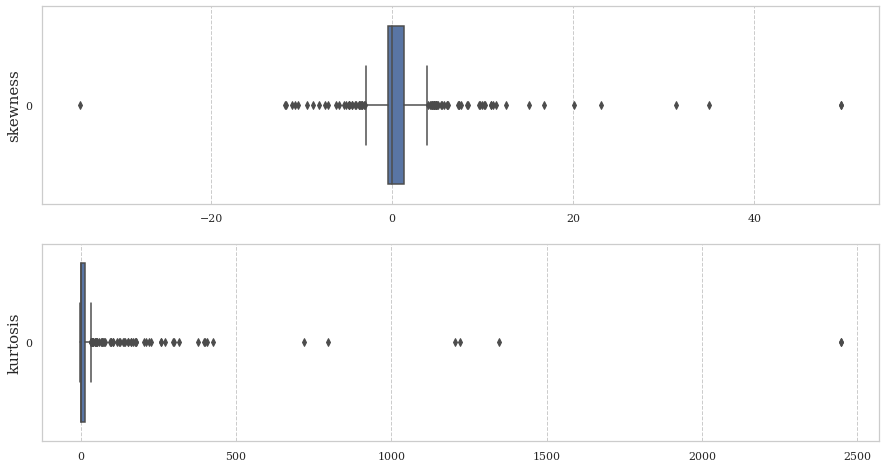

<Figure size 1440x360 with 0 Axes>

In [259]:
fig, axs = plt.subplots(2, 1)
plt.figure(figsize=(20,5))
ax1 = sns.boxplot(data=skews, orient="h", ax=axs[0])
ax1.set(ylabel="skewness")
ax2 = sns.boxplot(data=kurts, orient="h", ax=axs[1])
ax2.set(ylabel="kurtosis")
plt.show()

In [198]:
normal = [var for var in df_num_train if df_num_train[var].skew() < 0.5 or df_num_train[var].skew() > -0.5]

In [199]:
# fraction of distributions with a skewness less than 0.5 or more than -0.5 (i.e. very few normal distributions)
len(normal) / len(df_train)

0.2324945295404814

### Data balancing

In [284]:
df_cat_train = df_train.select_dtypes(include="object") 
df_cat_test = df_test.select_dtypes(include="object") 
df_cat_train.columns

Index(['modality', 'vocal_channel', 'emotion', 'emotional_intensity',
       'statement', 'repetition', 'sex', 'filename'],
      dtype='object')

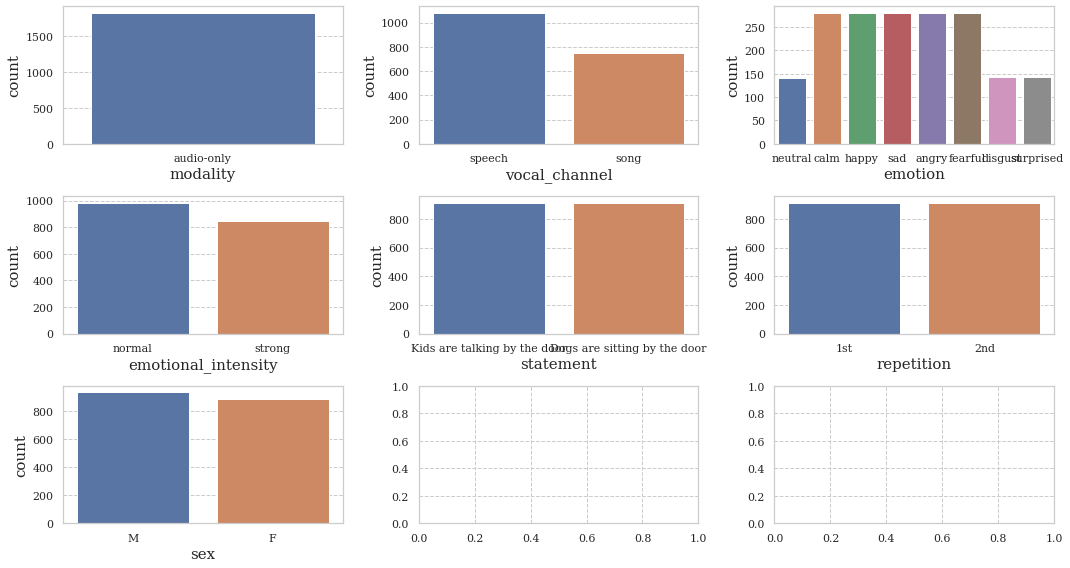

In [299]:
fig, axs = plt.subplots(3, 3)
sns.countplot(x=df_cat_train["modality"], ax=axs[0, 0])
sns.countplot(x=df_cat_train["vocal_channel"], ax=axs[0, 1])
sns.countplot(x=df_cat_train["emotion"], ax=axs[0, 2])
sns.countplot(x=df_cat_train["emotional_intensity"], ax=axs[1, 0])
sns.countplot(x=df_cat_train["statement"], ax=axs[1, 1])
sns.countplot(x=df_cat_train["repetition"], ax=axs[1, 2])
sns.countplot(x=df_cat_train["sex"], ax=axs[2, 0])
fig.tight_layout()

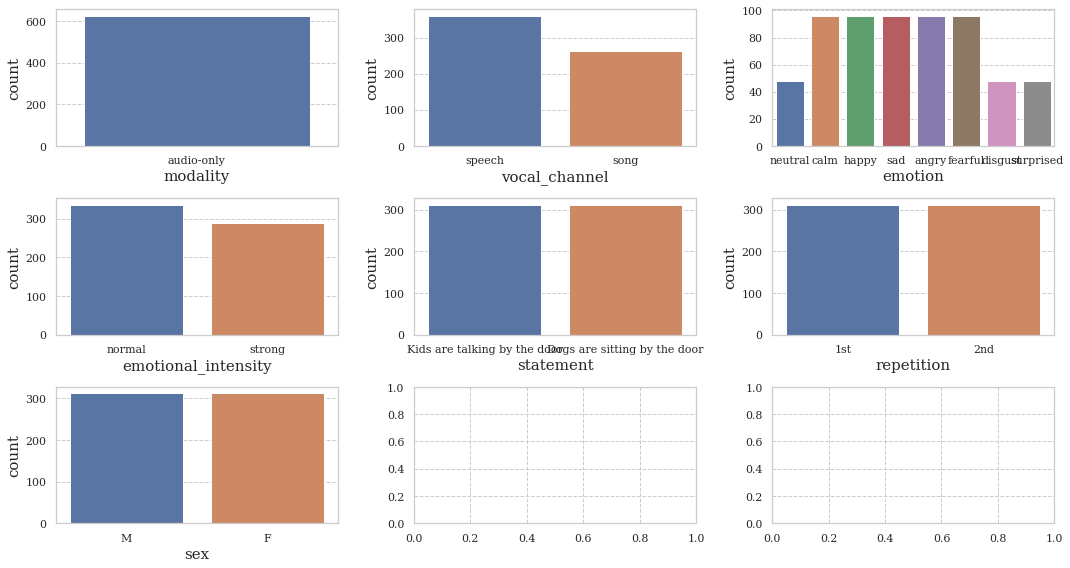

In [300]:
fig, axs = plt.subplots(3, 3)
sns.countplot(x=df_cat_test["modality"], ax=axs[0, 0])
sns.countplot(x=df_cat_test["vocal_channel"], ax=axs[0, 1])
sns.countplot(x=df_cat_test["emotion"], ax=axs[0, 2])
sns.countplot(x=df_cat_test["emotional_intensity"], ax=axs[1, 0])
sns.countplot(x=df_cat_test["statement"], ax=axs[1, 1])
sns.countplot(x=df_cat_test["repetition"], ax=axs[1, 2])
sns.countplot(x=df_cat_test["sex"], ax=axs[2, 0])
fig.tight_layout()

### Correlation analysis for feature selection

In [96]:
def spearman_selector(target, df, k):
    """Returns a df comprising all the features highly correlated (above k and below -k)
    with the binary target according Spearman coefficient. Target must be a pd Series"""
    df = df.select_dtypes(include="number")
    target = target.map({target.unique()[0]:0, target.unique()[1]:1})
    new_df = pd.DataFrame()
    for col in df:
        spearman = sp.spearmanr(df[col], target)[0]
        if spearman > k or spearman < -k:
            new_df[col] = df[col]
    return new_df 

# note: it returns a df but we can output a list if more convenient. Only suitable for binary targets

In [97]:
spearman_selector(df_train["vocal_channel"], df_train, 0.5)

,frame_count,q25,q75,kur,lag1_q25,lag1_q75,mfcc_sum,mfcc_q25,sc_mean,sc_q50,...,sc_std_w4,sc_min_w4,sc_q01_w4,sc_q05_w4,stft_mean_w4,stft_std_w4,stft_min_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4
0,158558,-0.000031,0.000000,15.028520,0.000000,0.000000,-197329.278906,-2.440220,7416.297748,9147.820660,...,1566.324873,0.000000,6157.993552,8928.597851,0.791036,0.155455,0.000000,0.000000,0.566462,0.709962
1,160160,-0.000031,0.000000,16.488415,0.000000,0.000000,-196963.570413,-3.248759,7135.571471,8052.808972,...,1564.480577,6469.028326,6851.186876,7328.169993,0.744699,0.163183,0.270133,0.368623,0.472736,0.623183
2,156956,0.000000,0.000000,17.035218,0.000000,0.000000,-193866.638041,-2.454553,7239.265648,9010.389010,...,1713.750086,0.000000,5913.004872,8117.809961,0.751478,0.190634,0.000000,0.000000,0.417919,0.643636
3,152152,-0.000031,0.000000,21.824521,0.000000,0.000000,-184150.973286,-2.546799,7008.958170,8415.361716,...,1464.156919,6527.892850,6628.825877,6943.991628,0.736895,0.182551,0.205616,0.306280,0.399641,0.606910
4,169769,-0.000031,0.000000,13.236022,0.000000,0.000000,-218952.728640,-3.493539,6997.311811,7491.276199,...,1711.334731,5424.476334,5609.450353,7045.094766,0.744390,0.177069,0.177847,0.248765,0.428202,0.634815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,168168,0.000000,0.000031,6.504521,-0.000031,0.000000,-227313.337694,-9.592798,7075.181444,8756.191074,...,3773.701604,0.000000,0.000000,0.000000,0.663444,0.294603,0.000000,0.000000,0.000000,0.542632
1824,174575,-0.000031,0.000031,9.706586,-0.000031,0.000031,-212587.010178,-8.817486,6601.584550,6630.925871,...,3623.101937,0.000000,0.000000,0.000000,0.614458,0.323299,0.000000,0.000000,0.000000,0.375423
1825,169770,0.000000,0.000031,5.874582,-0.000031,0.000000,-213371.196654,-10.357914,7146.779943,7274.227138,...,2856.487195,0.000000,0.000000,5496.940032,0.634339,0.288322,0.000000,0.000000,0.097608,0.446789
1826,185786,-0.000031,0.000092,4.482247,-0.000031,0.000031,-228990.432092,-12.790096,6557.772350,7429.200346,...,4001.465168,0.000000,0.000000,0.000000,0.622818,0.323022,0.000000,0.000000,0.000000,0.484284


In [98]:
spearman_selector(df_train["sex"], df_train, 0.5)

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


,mfcc_q05,mfcc_q25,mfcc_q75,mfcc_q95,mfcc_q99,stft_sum,stft_mean,stft_std,stft_min,stft_q01,...,mfcc_q99_w3,stft_sum_w3,stft_mean_w3,stft_min_w3,stft_q01_w3,stft_q05_w3,stft_q25_w3,stft_q50_w3,stft_q75_w3,stft_skew_w3
0,-103.279677,-2.440220,4.410921,30.161469,168.757852,2355.100189,0.633091,0.280529,0.000000,0.049578,...,210.637413,460.854534,0.492366,0.037280,0.053458,0.082868,0.234335,0.457067,0.716272,0.288573
1,-117.846572,-3.248759,4.701189,31.279460,165.340459,2364.657245,0.629568,0.277748,0.008878,0.048266,...,211.687065,431.816820,0.455503,0.020514,0.047669,0.077696,0.209817,0.399900,0.666386,0.513204
2,-74.911534,-2.454553,3.973402,26.970543,175.846084,2284.022589,0.619984,0.279639,0.000000,0.039225,...,212.727927,425.854665,0.460882,0.033132,0.046734,0.079643,0.221506,0.416596,0.662923,0.474012
3,-68.482247,-2.546799,4.798085,28.344560,165.640911,2190.683159,0.612607,0.263994,0.032363,0.058727,...,197.815864,463.627901,0.515142,0.027732,0.049062,0.081110,0.295453,0.480967,0.726674,0.239217
4,-83.403776,-3.493539,4.701327,34.965457,167.973568,2423.241086,0.608243,0.293414,0.000000,0.011911,...,199.890891,437.730929,0.439489,0.028548,0.046423,0.075805,0.189045,0.369970,0.641794,0.575065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,-90.941761,-9.592798,0.410101,28.452868,137.084273,2220.999181,0.562563,0.340681,0.000000,0.000000,...,173.941818,351.766309,0.353179,0.000363,0.002575,0.014967,0.089843,0.243799,0.544277,0.829002
1824,-103.682065,-8.817486,0.882308,28.337877,105.726173,1962.304308,0.479547,0.348805,0.000000,0.000000,...,146.737877,360.776475,0.349590,0.001024,0.002744,0.011331,0.058364,0.226359,0.602930,0.740477
1825,-105.428785,-10.357914,0.000000,24.086425,114.168244,2151.197033,0.539959,0.347612,0.000000,0.000000,...,144.204660,344.571992,0.345956,0.001561,0.004100,0.011579,0.064233,0.239703,0.572697,0.783640
1826,-93.090706,-12.790096,0.000000,26.583410,114.339435,2001.759296,0.459541,0.354349,0.000000,0.000000,...,150.335224,368.220076,0.337198,0.001530,0.004982,0.014637,0.065956,0.213669,0.542848,0.879855


In [100]:
spearman_selector(df_train["emotional_intensity"], df_train, 0.4)

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


,max,mfcc_std,mfcc_min,mfcc_q01,mfcc_std_w2
0,0.040588,165.355352,-861.532578,-861.532578,132.693644
1,0.048157,163.853142,-861.443935,-861.443935,129.717385
2,0.058472,163.238841,-851.233799,-851.233799,131.611620
3,0.062683,162.217347,-847.867170,-847.048093,132.217187
4,0.026215,172.859991,-917.402654,-917.309180,140.532952
...,...,...,...,...,...
1823,0.034760,159.099528,-856.987334,-856.987334,125.415821
1824,0.072968,143.246956,-791.942768,-791.942768,103.718889
1825,0.069611,143.883952,-785.679030,-785.679030,109.088697
1826,0.069977,138.269051,-769.036490,-769.036490,98.798970


## DATA PREPARATION

Removing variables with unique value:

In [64]:
var_train = [var for var in df_train if len(df_train[var].unique()) == 1]
var_test = [var for var in df_test if len(df_test[var].unique()) == 1]
var_train == var_test

False

In [65]:
to_be_eliminated = [var for var in var_train if var in var_test]
to_be_eliminated == var_train

False

In [71]:
df_train_processed = df_train.drop(to_be_eliminated, axis=1)
df_test_processed = df_test.drop(to_be_eliminated, axis=1)
print(len(to_be_eliminated))
print(df_train.shape, df_test.shape)
print(df_train_processed.shape, df_test_processed.shape)

50
(1828, 434) (624, 434)
(1828, 384) (624, 384)


In [70]:
df_train_processed.to_csv("df_train_processed.csv")
df_test_processed.to_csv("df_test_processed.csv")